# From Notebooks to the Web: Panel

## Web-based Data Viz

We discuss ways to translate our analysis results to the Web in a meaningful way. 

**Last lecture**

1. Embedding interactive charts on the Web via Quarto & Github Pages

**This lecture**

2. Creating Web apps & dashboards using the Python library [Panel](https://panel.holoviz.org/)


A brief aside on web servers

A few quick basics before we move on to interactive Web apps with Panel...

### Some (oversimplified) basics

- The browser needs a file --> it requests it via a "get" request using the HTTP protocol
- The web server receives the request, and if the requested file exists, sends it back to the browser using HTTP

<img src="imgs/web-server.png" width=800>

### Two main types

**Static** and **dynamic**

#### Static Web Servers

- Serves hosted HTML files to the browser "as-is"
- Response from the server is always the same, regardless of what the user does — *static*
- **Example:** Our Quarto-generated sites hosted via Github Pages from last lecture

- The term "static" here is a little confusing! As we saw last week with GitHub Pages, static sites can still contain interactive visualizations. The interactive features are enabled via the underlying Javascript contained in the visualizations.

- Most importantly, **static sites can't execute any Python code to change what is displayed**!

#### Dynamic Web Servers

- Capable of serving *dynamic* content to browsers
- Extra software that executes *server-side* before sending the response back to the browser
- Common example: APIs
    - Browser sends request for data with specific query parameters
    - API server responds dynamically, sending the requested data
    

::: {.callout-note title="Dashboards"}
As we will see soon, Python dashboards need to be hosted on dynamic servers. The user will change parameters, the server will execute the necessary Python code, and the dashboard will update.
:::

For more information on Web servers, check out the [Mozilla documentation](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_is_a_web_server).


### Flashback: The CARTO API

This is an example of a *dynamic* web server

<img src="imgs/carto-url.png" width=1200></img>

### API requests are just like dashboards!

You can think of API requests as very similar to hosted Python dashboards, also known as web apps:

**APIs:** API requests include *query parameters* that the user specifies in order to ask for specific types of data | back.

**Dashboards:** Dashboards will take input parameters from a user via widgets, the server executes the necessary code, and the dashboard updates to reflect the user input


# Panel


<a href="https://panel.pyviz.org/" ><img src="imgs/panel-logo.png" width=300></a>

The result of Python programmers asking the question: **can we build a dashboard just in Python?**

<br/>

The answer is yes...for the most part.

You still need to use *some* CSS styling and general knowledge about HTML. But everything is coded in Python.

### A high-level dashboarding solution in Python

- Relatively new: announced in 2019 and they just reached version 1.0 in May 2023, currently 1.5.4
- In my opinion, one of the most promising dashboard libraries so far

**Key Features:**
- ⭐️ It is designed to be plotting-library agnostic, fully supporting a wide range of Python libraries out of the box
- Works just as well in a Jupyter notebook as on a standalone secure web server
- ⭐️ Out-of-the-box support for big data libraries datashader and dask
- ⭐️ Large set of interactive and aesthetically pleasing widgets`
- Support for custom and more complex layouts (e.g., multi-page apps)


Above, I've put a ⭐️ next to the three features that I think separate Panel from the other dashboarding libraries in Python

### The "Big 4" 

Right now, there a four "big" dashboarding libraries in Python (with newer one starting up often!):

- [Dash](https://dash.plotly.com/)
- [Panel](https://panel.holoviz.org/)
- [Voila](https://voila.readthedocs.io/en/stable/)
- [Streamlit](https://streamlit.io/)

- I recommend reading through [this blog article by Quantsight](https://quansight.com/post/dash-voila-panel-streamlit-our-thoughts-on-the-big-four-dashboarding-tools/#which-one-should-i-use) for a great discussion of the current state of Python dashboarding (as well as a little bit of dataviz history).

From [this article by Quantsight](https://quansight.com/post/dash-voila-panel-streamlit-our-thoughts-on-the-big-four-dashboarding-tools/#which-one-should-i-use):

![](imgs/dashboarding-comp.png)

From the [Panel FAQs](https://panel.pyviz.org/FAQ.html):


![](imgs/panel_comparison.png)

**Key feature:** 
- Panel provides the best support for working in Jupyter notebooks, allowing you to do the entire data wrangling workflow and dashboard deployment in a Jupyter notebook
- Panel is the only package to support datashader, dask, and visualizing large datasets

### Recommended Readings/Videos for Panel

- [PyData talk in Dec 2019 from the creator of Panel](https://www.youtube.com/watch?v=Ohr29FJjBi0)
- [Components section of Panel User Guide](https://panel.holoviz.org/explanation/components/components_overview.html)
- [API section of Panel User Guide](https://panel.holoviz.org/explanation/api/index.html)

### Dashboard apps in Panel

- Panel contains multiple different APIs to create interactive dashboards. 
- Allows you to make a dashboard from a single function, or build up more complex dashboards with many components


When using Panel, the general workflow will involve the following steps:

1. User changes some parameters via widgets
1. The dashboard knows which charts depends on those parameters
1. The necessary functions are executed to properly update the dashboard 

This is a *reactive* workflow.

#### The default panel import

In [2]:
# Load panel and enable interactive features
import panel as pn

pn.extension()

### Key concepts

<span style="background-color: yellow;">Check websites below - cool visuals</span>

**1. Panes**
    - A Pane wraps external viewable items like Bokeh, Plotly, Vega/Altair, or HoloViews plots, so they can be embedded in a dashboard. When the wrapped object or any parameter changes, a pane will update the view accordingly.
    - Check out the [Panes section of the component gallery](https://panel.holoviz.org/reference/index.html#panes) for the full set of available panes -- there are many!
    - See more info on the [docs](https://panel.holoviz.org/explanation/components/components_overview.html#panes)
    
**2. Widgets**
    - A wrapper for the values the user selects, which determines which Panes get updated and which data is shown in the dashboard
    - Check out the [Widgets section of the component gallery](https://panel.holoviz.org/reference/index.html#widgets) for the full set of available widgets -- there are many!
    - See more info on the [docs](https://panel.holoviz.org/explanation/components/components_overview.html#panes)
    
**3. Panels**
    - Layout objects allow combining plots into a Row, Column, Tabs or a Grid.
    - See the [Layout section of the component gallery](https://panel.holoviz.org/reference/index.html#layouts) for the full set of available layouts
    - See more info on the [docs](https://panel.holoviz.org/explanation/components/components_overview.html#panels)

**Overall**, there is *always* a layout piece and a reactive parameter/callback piece.


### The Param library

![](imgs/param-logo.png){width=200}

- Widgets in Panel are implemented using *Parameter* objects from the `Param` library
- These widgets allow you to declare the parameters of a dashboard in a declarative manner.
- Parameters have corresponding widgets for the user can change their value
- Example parameters/widget combos are available [on the Panel docs](https://panel.holoviz.org/explanation/dependencies/param.html)


**Key things to know about Parameters**

- Parameters drive the reactive nature of Panel dashboards
- Think of Parameters as references to a value, similar to how Excel works 
- In excel, when you reference a particular cell in the formula of another cell, changing the original cell will automatically trigger an update in all cells that reference. The same concept applies to Parameter objects.

For example:

In [3]:
text = pn.widgets.TextInput()
text

TextInput()

In [4]:
# The "value" Parameter of this widget reflects the current value at the time the code is executed
text.value

''

In [5]:
# This is the reference to the live value, just like a cell reference in excel
text.param.value 

More on this to come!

### Panel APIs: different ways to use Panel

There are three main ways (what they call APIs) to use Panel to create dashboards:

- **Interact functions:** Auto-generates a full UI (including widgets) given a function (not dicussed here)
- **Reactive functions:** Linking functions or methods to widgets using pn.bind or the equivalent pn.depends decorator, declaring that the function should be re-run when those widget values change
- **Parameterized classes:** Declare parameters and their ranges in Parameterized classes, then get GUIs (and value checking!) for free


**Reference:** See [the API section of the User Guide](https://panel.holoviz.org/explanation/api/index.html) for a more detailed discussion

### Quick API demo: the "cars" dataset

We'll demonstrate the three Panel APIs by creating the same, small dashboard using the "cars" example dataset. Then, we'll dive into more complex and realistic examples!  

In [6]:
#!pip install bokeh_sampledata 
import bokeh.sampledata

In [7]:
import hvplot.pandas
from bokeh.sampledata.autompg import autompg # cars dataset

In [8]:
autompg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# Set up a function to plot using hvplot
def autompg_plot(x="mpg", y="hp", color="#058805"):
    return autompg.hvplot.scatter(x, y, c=color, padding=0.1)

# Get the columns to use
columns = list(autompg.columns[:-2])
columns

['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr']

# <span style="color:blue">Reactive Functions</span>

- You must use the `pn.bind` function to select and configure widgets explicity and to lay out components explicitly.
- The `pn.bind()` function explicitly links the values of the widgets to the arguments of a function.
- For more info, see this discussion of the [pros and cons](https://panel.holoviz.org/explanation/api/reactive.html) of this approach.

In [16]:
# Create the widgets
xSelect = pn.widgets.Select(value="mpg", options=columns, name="x")
ySelect = pn.widgets.Select(value="hp", options=columns, name="y")
colorPicker = pn.widgets.ColorPicker(name="Color", value="#AA0505")

# Create the dashboard
reactive_dashboard = pn.Column(
    pn.Row(
        pn.bind(autompg_plot, x=xSelect, y=ySelect, color=colorPicker),  # Main chart
        pn.Column(
            "## MPG Explorer", xSelect, ySelect, colorPicker
        ),  # Title and widgets
    ),
)

reactive_dashboard

Column
    [0] Row
        [0] ParamFunction(function, _pane=HoloViews, defer_load=False)
        [1] Column
            [0] Markdown(str)
            [1] Select(name='x', options=['mpg', 'cyl', ...], value='mpg')
            [2] Select(name='y', options=['mpg', 'cyl', ...], value='hp')
            [3] ColorPicker(name='Color', value='#AA0505')

## A more realistic example with the reactive API

Let's re-visit our trash-related 311 requests.

In Lecture 4B, we used Folium plugins to explore the trends by neighborhood, focusing specifically on the Greenwich neighborhood. We can use Panel widgets to easily add a widget to explore different neighborhoods.

Let's use the `pn.bind()` function to build a Panel dashboard that adds a dropdown widget to select the neighborhood we want to explore.

In [56]:
import folium
import geopandas as gpd
import pandas as pd
import xyzservices

First, let's load the dataset from a CSV file and convert to a GeoDataFrame:

In [57]:
# Load the data from a CSV file into a pandas DataFrame (from last year)
trash_requests_df = pd.read_csv(
    "https://raw.githubusercontent.com/MUSA-550-Fall-2023/week-4/main/data/trash_311_requests_2020.csv"
)

# Remove rows with missing geometry
trash_requests_df = trash_requests_df.dropna(subset=["lat", "lon"])

# Create our GeoDataFrame with geometry column created from lon/lat
trash_requests = gpd.GeoDataFrame(
    trash_requests_df,
    geometry=gpd.points_from_xy(trash_requests_df["lon"], trash_requests_df["lat"]),
    crs="EPSG:4326",
)

In [58]:
trash_requests.head()

,objectid,service_request_id,status,status_notes,service_name,service_code,agency_responsible,service_notice,requested_datetime,updated_datetime,expected_datetime,address,zipcode,media_url,lat,lon,geometry
0,8180042,13269656,Closed,NaN,Rubbish/Recyclable Material Collection,SR-ST03,Streets Department,2 Business Days,2020-04-02 19:22:24,2020-04-06 07:02:57,2020-04-06 20:00:00,624 FOULKROD ST,NaN,NaN,40.034389,-75.106518,POINT (-75.10652 40.03439)
1,8180043,13266979,Closed,NaN,Rubbish/Recyclable Material Collection,SR-ST03,Streets Department,2 Business Days,2020-04-02 08:40:53,2020-04-06 07:02:58,2020-04-05 20:00:00,1203 ELLSWORTH ST,NaN,NaN,39.936164,-75.163497,POINT (-75.16350 39.93616)
2,7744426,13066443,Closed,NaN,Rubbish/Recyclable Material Collection,SR-ST03,Streets Department,2 Business Days,2020-01-02 19:17:55,2020-01-04 05:46:06,2020-01-06 19:00:00,9054 WESLEYAN RD,NaN,NaN,40.058737,-75.018345,POINT (-75.01835 40.05874)
3,7744427,13066540,Closed,NaN,Rubbish/Recyclable Material Collection,SR-ST03,Streets Department,2 Business Days,2020-01-03 07:01:46,2020-01-04 05:46:07,2020-01-06 19:00:00,2784 WILLITS RD,NaN,NaN,40.063658,-75.022347,POINT (-75.02235 40.06366)
4,7801094,13089345,Closed,NaN,Rubbish/Recyclable Material Collection,SR-ST03,Streets Department,2 Business Days,2020-01-15 13:22:14,2020-01-16 14:03:29,2020-01-16 19:00:00,6137 LOCUST ST,NaN,NaN,39.958186,-75.244732,POINT (-75.24473 39.95819)


Load neighborhoods and do the spatial join to associate a neighborhood with each ticket:

In [59]:
# Load the neighborhoods
neighborhoods = gpd.read_file(
    "https://raw.githubusercontent.com/MUSA-550-Fall-2023/week-4/main/data/zillow_neighborhoods.geojson"
)

# Do the spatial join to add the "ZillowName" column
requests_with_hood = gpd.sjoin(
    trash_requests,
    neighborhoods.to_crs(trash_requests.crs), # REMEMBER: convert to the right CRS
    predicate="within",
)

In [21]:
len(requests_with_hood)

47685

In earlier lectures, we have explored trends in the Greenwich neighborhood of the city:

In [22]:
# Extract out the point tickets for Greenwich
greenwich_tickets = requests_with_hood.query("ZillowName == 'Greenwich'")

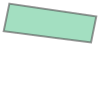

In [23]:
# Get the neighborhood boundary for Greenwich
greenwich_geo = neighborhoods.query("ZillowName == 'Greenwich'")

greenwich_geo.squeeze().geometry

Use the `explore()` function to create a Folium map of the tickets:

In [24]:
# Plot the neighborhood boundary
m = greenwich_geo.explore(
    style_kwds={"weight": 4, "color": "black", "fillColor": "none"},
    name="Neighborhood boundary",
    tiles=xyzservices.providers.CartoDB.Voyager,
)


# Add the individual tickets as circle markers and style them
greenwich_tickets.explore(
    m=m,  # Add to the existing map!
    marker_kwds={"radius": 7, "fill": True, "color": "crimson"},
    marker_type="circle_marker",  # or 'marker' or 'circle'
    name="Tickets",
)

m  # show map

#### Improvement #1: Add a neighborhood dropdown

Let's add our dropdown widget for neighborhood. We'll use a [Select widget](https://panel.holoviz.org/reference/widgets/Select.html).

First, we need to get a list of the unique neighborhood names we want to include as options.

In [60]:
neighborhood_names = list(neighborhoods['ZillowName'].unique())

neighborhood_names[:10]

['Academy Gardens',
 'Airport',
 'Allegheny West',
 'Andorra',
 'Aston Woodbridge',
 'Bartram Village',
 'Bella Vista',
 'Belmont',
 'Brewerytown',
 'Bridesburg']

Create the widget:

In [61]:
# Create the widget
neighborhoodSelect = pn.widgets.Select(
    value="Greenwich", options=neighborhood_names, name="Neighborhood"
)

neighborhoodSelect

Select(name='Neighborhood', options=['Academy Gardens', ...], value='Greenwich')

Now, let's set up our reactive "callback" function: this is the function that will be called every time the widget updates.

This function will do the following things. Provided with an input neighborhood name, it will:

1. Filter the tickets data for input neighborhood
2. Get the geometry for the neighborhood
3. Plot the geometry boundary and tickets on the same Folium map
4. Return a panel Folium "pane"


- In the last step we return a [Folium pane](https://panel.holoviz.org/reference/panes/Folium.html). This is Panel's wrapper of a Folium map. Importantly, it let's us set the height of the Folium map in the dashboard!


In [62]:
def filter_by_neighborhood(data, neighborhood_name):
    """
    Filter data by neighborhood.
    """
    sel = data["ZillowName"] == neighborhood_name
    return data.loc[sel]


def plot_ticket_data(data, neighborhood_name):
    """
    Plot the ticket data and neighborhood boundary on a Folium map.
    """

    # Get the neighborhood geometry
    sel = neighborhoods["ZillowName"] == neighborhood_name
    hood_geo = neighborhoods.loc[sel]

    # Plot the neighborhood boundary
    m = hood_geo.explore(
        style_kwds={"weight": 4, "color": "black", "fillColor": "none"},
        name="Neighborhood boundary",
        tiles=xyzservices.providers.CartoDB.Voyager,
    )

    # Step 4: Overlay the individual tickets as circle markers and style them
    data.explore(
        m=m,  # Add to the existing map!
        marker_kwds={"radius": 7, "fill": True, "color": "crimson"},
        marker_type="circle_marker",  # or 'marker' or 'circle'
        name="Tickets",
    )

    return m

In [63]:
def create_dashboard_1(neighborhood_name):
    """
    Plot trash-related requests for the input neighborhood.
    """
    # Step 1: Filter the tickets data for input neighborhood
    tickets = filter_by_neighborhood(requests_with_hood, neighborhood_name)

    # Step 2: Make the Folium map
    m = plot_ticket_data(tickets, neighborhood_name)

    # Step 3: Return a Folium pane
    # IMPORTANT: set the height!
    return pn.pane.plot.Folium(m, height=600)

Let's layout out our dashboard:

In [64]:
# Create the dashboard
ticket_dashboard_1 = pn.Column(
    # Top: the title and dropdown widget
    pn.Column("## Trash-Related 311 Tickets by Neighborhood", neighborhoodSelect),
    # Add a height spacer
    pn.Spacer(height=25),
    # Bottom: the main chart, bind widgets to the function
    pn.bind(create_dashboard_1, neighborhood_name=neighborhoodSelect),
)


ticket_dashboard_1

Column
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Neighborhood', options=['Academy Gardens', ...], value='Greenwich')
    [1] Spacer(height=25)
    [2] ParamFunction(function, _pane=Folium, defer_load=False)

#### Improvement #2: Add a date range slider

Let's add a [datetime range slider widget](https://panel.holoviz.org/reference/widgets/DatetimeRangeSlider.html) that will allow us to show tickets for a particular date range.


The datetime slider widget expects "datetime" objects from the built-in datetime library. Let's import it first:

In [65]:
import datetime as dt

Our data is from 2020. So, let's set the default values: Jan 1, 2020 and Dec 31, 2020:

In [66]:
DEFAULT_START = dt.datetime(2020, 1, 1)
DEFAULT_END = dt.datetime(2020, 12, 31)


- We have used upper case for these default variable names. 
- That's a good notation to follow... it helps you easily separate out variables that are constant and unchanging when doing dashboard design!

Now, initialize the datetime range slider.

Note that the value of the slider is a *tuple* of two values: `(start_date, end_date)`

In [67]:
datetime_range_slider = pn.widgets.DatetimeRangeSlider(
    name="Date Slider",
    start=DEFAULT_START,
    end=DEFAULT_END,
    value=(DEFAULT_START, DEFAULT_END),
    step=1000 * 60 * 60,  # 1 hour in milliseconds
)

datetime_range_slider

DatetimeRangeSlider(end=datetime.datetime(2020, ..., name='Date Slider', start=datetime.datetime(2020, ..., step=3600000, value=(datetime.datetime(2020, ..., value_end=datetime.datetime(2020, ..., value_start=datetime.datetime(2020, ...)

The value is a tuple of start and end dates:

In [48]:
datetime_range_slider.value

(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2020, 12, 31, 0, 0))

Let's also create a new neighborhood widget to avoid confusion across multiple dashboards:

In [68]:
# Create the widget
neighborhoodSelect_2 = pn.widgets.Select(
    value="Greenwich", options=neighborhood_names, name="Neighborhood"
)

Now, we'll define a new function that filters the data by neighborhood AND date range:

In [69]:
def filter_by_date(data, start_date, end_date):
    """
    Filter data by start and end date.
    """
    # Convert ticket column of strings to DateTime objects
    requested_dates = pd.to_datetime(data["requested_datetime"])

    ## Two selections
    sel_start = requested_dates >= start_date
    sel_end = requested_dates <= end_date

    ## Logical "and" for final selection
    date_sel = sel_start & sel_end

    ## Filter tickets by date range
    return data.loc[date_sel]

Second example callback function:

In [70]:
def create_dashboard_2(neighborhood_name, date_range):
    """
    Plot trash-related requests for the input neighborhood AND date range.
    """
    # Step 1: Filter the tickets data for input neighborhood
    tickets = filter_by_neighborhood(requests_with_hood, neighborhood_name)

    # NEW, Step 2: Do the selection by the input date
    tickets = filter_by_date(tickets, date_range[0], date_range[1])

    # Step 3: Make the Folium map
    m = plot_ticket_data(tickets, neighborhood_name)

    # Step 5: Return a Folium pane
    return pn.pane.plot.Folium(m, height=600)

In [71]:
# Create the dashboard
ticket_dashboard_2 = pn.Column(
    # Top: the title and dropdown widget
    pn.Column(
        "## Trash-Related 311 Tickets by Neighborhood",
        neighborhoodSelect_2,
        datetime_range_slider,
    ),
    # Add a height spacer
    pn.Spacer(height=25),
    # Bottom: the main chart, bind widgets to the function
    pn.bind(
        create_dashboard_2,
        neighborhood_name=neighborhoodSelect_2,
        date_range=datetime_range_slider,
    ),
)


ticket_dashboard_2

Column
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Neighborhood', options=['Academy Gardens', ...], value='Greenwich')
        [2] DatetimeRangeSlider(end=datetime.datetime(2020, ..., name='Date Slider', start=datetime.datetime(2020, ..., step=3600000, value=(datetime.datetime(2020, ..., value_end=datetime.datetime(2020, ..., value_start=datetime.datetime(2020, ...)
    [1] Spacer(height=25)
    [2] ParamFunction(function, _pane=Folium, defer_load=False)

#### Improvement #3: Let's show the currently filtered data

We can use the [Tabulator widget](https://panel.holoviz.org/reference/widgets/Tabulator.html) to show the ticket data. Let's add the table below the map -- we can update our dashboard function to add it below the map in a panel Column!

Re-initialize our widgets to avoid confusion with multiple dashboards:

In [72]:
# Neighborhood select
neighborhoodSelect_3 = pn.widgets.Select(
    value="Greenwich", options=neighborhood_names, name="Neighborhood"
)

# Datetime slide
datetime_slider_3 = pn.widgets.DatetimeRangeSlider(
    name="Date Slider",
    start=DEFAULT_START,
    end=DEFAULT_END,
    value=(DEFAULT_START, DEFAULT_END),
    step=1000 * 60 * 60,  # 1 hour in milliseconds
)

Callback function for example #3

In [73]:
def plot_ticket_data_3(neighborhood_name, date_range):
    """
    Plot trash-related requests for the input neighborhood AND date range.

    Output a Folium map and data table.
    """
    # Step 1: Filter the tickets data for input neighborhood
    tickets = filter_by_neighborhood(requests_with_hood, neighborhood_name)

    # Step 2: Do the selection by the input date
    tickets = filter_by_date(tickets, date_range[0], date_range[1])

    # Step 3: Make the Folium map
    m = plot_ticket_data(tickets, neighborhood_name)

    # Step 4: Ouput map and table
    return pn.Column(
        pn.pane.plot.Folium(m, height=600),
        pn.widgets.Tabulator(tickets, show_index=False, page_size=25),
    )

In [74]:
# Create the dashboard
ticket_dashboard_3 = pn.Column(
    # Top: the title and dropdown widget
    pn.Column(
        "## Trash-Related 311 Tickets by Neighborhood",
        neighborhoodSelect_3,
        datetime_slider_3,
    ),
    # Add a height spacer
    pn.Spacer(height=25),
    # Bottom: the main chart, bind widgets to the function
    pn.bind(
        plot_ticket_data_3,
        neighborhood_name=neighborhoodSelect_3,
        date_range=datetime_slider_3,
    ),
)


ticket_dashboard_3

Column
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Neighborhood', options=['Academy Gardens', ...], value='Greenwich')
        [2] DatetimeRangeSlider(end=datetime.datetime(2020, ..., name='Date Slider', start=datetime.datetime(2020, ..., step=3600000, value=(datetime.datetime(2020, ..., value_end=datetime.datetime(2020, ..., value_start=datetime.datetime(2020, ...)
    [1] Spacer(height=25)
    [2] ParamFunction(function, _pane=Column, defer_load=False)

In [75]:
ticket_dashboard_3.show()

Launching server at http://localhost:65161


### The reactive API: takeaways

- Very powerful for exploratory analyses in a notebook
- Complex data wrangling can get complicated!
    - *For example*: what if we wanted to add another pane with another function to our previous dashboard? We would have to copy over the same filtering code to our new function -- no easy way to re-use the data selection steps we had in our first function.
    
**Takeaway**: It would be easier if we could *save* variables and repeat them across functions. This becomes possible if we use the third Panel API: parameterized classes!

# <span style="color:blue">Parametrized Classes</span>

You are welcome to use any of the APIs to create dashboards with Panel. However, this is my **recommended approach** when you are building more complex dashboards.

We'll define our app in a declarative fashion using a **custom Python class** that defines the various components of our dashboard, which include:

- The parameters we want the user to be able to change.
- *Reactive* functions to generate the various charts/maps in our dashboard, based on those input parameters.
- The dependencies between our chart functions and parameters.


**Note:** 
- The example apps we'll talk about in the future  use the class API to define the dashboard.
- For more info, see this discussion of the [pros and cons](https://panel.holoviz.org/explanation/api/parameterized.html) of this approach.

In [76]:
import param

### Important: Parameter Types

See the [panel docs](https://panel.holoviz.org/how_to/param/uis.html) for a guide to generate widgets directly from parameters using the class API.

In [77]:
columns

['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'yr']

In [78]:
# Define the class
class MPGExplorer(param.Parameterized):
    """A Panel dashboard class."""

    x = param.Selector(default="mpg", objects=columns)
    y = param.Selector(default="hp", objects=columns)
    color = param.Color(default="#0f0f0f")

    @param.depends("x", "y", "color")  # This is a Python "decorator"!
    def make_autompg_plot(self):
        return autompg.hvplot.scatter(x=self.x, y=self.y, c=self.color, padding=0.1)

For more info on decorators, check out [this DataCamp tutorial](https://www.datacamp.com/tutorial/decorators-python).

In [79]:
# Initialize the dashboard class object
explorer = MPGExplorer()

In [80]:
# Create the dashboard layout
# Note: widgets are stored in the 'param' attribute by default
class_dashboard = pn.Row(explorer.param, explorer.make_autompg_plot)

class_dashboard

Row
    [0] Column(margin=(5, 10), name='MPGExplorer')
        [0] StaticText(value='<b>MPGExplorer</b>')
        [1] Select(name='X', options=OrderedDict([('mpg', ...]), value='mpg')
        [2] Select(name='Y', options=OrderedDict([('mpg', ...]), value='hp')
        [3] ColorPicker(name='Color', value='#0f0f0f')
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

Note that when we change the selections above, the attributes of the `explorer` object update:

In [81]:
explorer.x

'mpg'

In [82]:
explorer.y

'hp'

In [83]:
explorer.color

'#0f0f0f'